# Multi-modal AssistantAgent Tutorial

## Overview

This tutorial demonstrates how to create and use a multi-modal AssistantAgent with AutoGen that can process both text and image inputs. You'll learn how to:

- Create `MultiModalMessage` objects that combine text and images
- Set up an `AssistantAgent` with OpenAI's vision-capable models
- Process image content and receive AI-generated responses
- Handle multi-modal conversations programmatically

The multi-modal capabilities allow your agents to understand and respond to visual content, opening up possibilities for image analysis, visual question answering, and rich interactive experiences.

## Example: Image Analysis with AssistantAgent

In this example, we use a `MultiModalMessage` ([API docs](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.MultiModalMessage)) to send both text and image data to our agent. The agent will analyze the image and provide a detailed response.

### Step 1: Load and Display an Image

First, we'll fetch an image from the web and prepare it for processing:


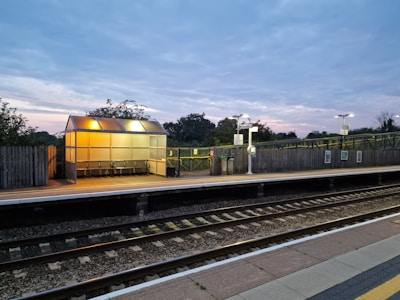

In [1]:
from io import BytesIO
import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Download and prepare the image
image_url = "https://images.unsplash.com/photo-1660625777256-c262c4a4b470?w=400"
image_bytes = BytesIO(requests.get(image_url).content)
pil_image = PIL.Image.open(image_bytes)

# Convert to AutoGen Image format
img = Image(pil_image)

# Display the image in the notebook
img

In [2]:
# Create a multi-modal message combining text question with the image
multi_modal_message = MultiModalMessage(
    content=["What is this image? Describe what you see in detail.", img], 
    source="user"
)

print("✓ Image loaded and multi-modal message created successfully")

✓ Image loaded and multi-modal message created successfully


### Step 2: Set Up the AssistantAgent and Process the Image

Now we'll create an AssistantAgent with a vision-capable model and process our multi-modal message:

In [3]:
from rich import print as rprint
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient

async def main() -> None:
    """
    Main function to demonstrate multi-modal agent interaction.
    
    This function:
    1. Initializes a GPT-4o model client (supports vision)
    2. Creates an AssistantAgent with the model
    3. Processes the multi-modal message containing text + image
    4. Displays both the text response and complete result object
    5. Properly cleans up resources
    """
    try:
        # Initialize the model client with GPT-4o (vision-capable)
        print("🔧 Initializing OpenAI model client...")
        model_client = OpenAIChatCompletionClient(
            model="gpt-4o",  # GPT-4o supports vision capabilities
        )
        
        # Create an AssistantAgent with the model client
        print("🤖 Creating AssistantAgent...")
        agent = AssistantAgent(
            name="vision_assistant", 
            model_client=model_client
        )
        
        # Process the multi-modal message
        print("🔍 Processing image with AI agent...")
        result = await agent.run(task=multi_modal_message)
        
        # Display the results
        print("\n" + "="*50)
        print("📝 RESPONSE TEXT:")
        print("="*50)
        print(result.messages[-1].content)
        
        print("\n" + "="*50)
        print("🔍 COMPLETE RESPONSE OBJECT:")
        print("="*50)
        rprint(result)
        
    except Exception as e:
        print(f"❌ Error occurred: {e}")
    
    finally:
        # Clean up resources
        print("\n🧹 Cleaning up resources...")
        await model_client.close()
        print("✅ Cleanup complete")

# Run the main function
await main()

🔧 Initializing OpenAI model client...
🤖 Creating AssistantAgent...
🔍 Processing image with AI agent...

📝 RESPONSE TEXT:
The image depicts a railway station platform at dusk or dawn. The scene includes:

1. **Platform**: The platform is empty and well-maintained, with a visible yellow line marking the edge where passengers should stand behind for safety.

2. **Shelter**: There is a small shelter on the platform, made of glass or plastic panels with a roof. It has a warm yellow light inside, probably lit up for the evening or early morning.

3. **Railway Tracks**: The tracks run parallel to the platform, with two visible rails and wooden sleepers.

4. **Surroundings**: In the background, there are trees and a fence, giving a sense of an open or rural environment.

5. **Lighting**: Besides the illuminated shelter, there are a few street lights along the platform, contributing to the calm ambiance.

The sky is slightly cloudy, adding to the peaceful atmosphere of the scene.

🔍 COMPLETE RE

TaskResult(
    messages=[
        MultiModalMessage(
            id='12e5478a-c174-400e-9118-49233c60ced4',
            source='user',
            models_usage=None,
            metadata={},
            created_at=datetime.datetime(2025, 8, 7, 19, 24, 23, 833046, tzinfo=datetime.timezone.utc),
            content=[
                'What is this image? Describe what you see in detail.',
                <autogen_core._image.Image object at 0xf9ae2ffa1280>
            ],
            type='MultiModalMessage'
        ),
        TextMessage(
            id='2da5f336-5eec-46ae-936b-0dc817bced47',
            source='vision_assistant',
            models_usage=RequestUsage(prompt_tokens=303, completion_tokens=186),
            metadata={},
            created_at=datetime.datetime(2025, 8, 7, 19, 24, 32, 851012, tzinfo=datetime.timezone.utc),
            content='The image depicts a railway station platform at dusk or dawn. The scene includes:\n\n1. 
**Platform**: The platform is empty and well-maintained, with a visible yellow line marking the edge where 
passengers should stand behind for safety.\n\n2. **Shelter**: There is a small shelter on the platform, made of 
glass or plastic panels with a roof. It has a warm yellow light inside, probably lit up for the evening or early 
morning.\n\n3. **Railway Tracks**: The tracks run parallel to the platform, with two visible rails and wooden 
sleepers.\n\n4. **Surroundings**: In the background, there are trees and a fence, giving a sense of an open or 
rural environment.\n\n5. **Lighting**: Besides the illuminated shelter, there are a few street lights along the 
platform, contributing to the calm ambiance.\n\nThe sky is slightly cloudy, adding to the peaceful atmosphere of 
the scene.',
            type='TextMessage'
        )
    ],
    stop_reason=None
)


🧹 Cleaning up resources...
✅ Cleanup complete


## Key Concepts Explained

### MultiModalMessage
- **Purpose**: Container for messages that include both text and non-text content (images, audio, etc.)
- **Content**: List that can contain strings, Image objects, and other media types
- **Source**: Identifies the sender of the message ("user", "assistant", etc.)

### Image Processing
- **PIL.Image**: Standard Python library for image manipulation
- **AutoGen Image**: Wrapper class that makes images compatible with AutoGen agents
- **BytesIO**: Allows treating bytes data as a file-like object for image loading

### Model Selection
- **GPT-4o**: OpenAI's vision-capable model that can process both text and images
- **Alternative models**: GPT-4-vision-preview, Claude-3 (with appropriate client)

### Best Practices
1. **Always close model clients** to prevent resource leaks
2. **Use try/except blocks** for error handling in async operations
3. **Validate image formats** before processing
4. **Consider rate limits** when making API calls

## Next Steps

Try these extensions to deepen your understanding:

1. **Upload your own images**: Replace the URL with local image files
2. **Chain multiple questions**: Create a conversation about the same image
3. **Compare multiple images**: Send several images in one message
4. **Add image generation**: Use DALL-E to create images based on the analysis
5. **Build a GUI**: Create a simple interface for image upload and analysis

For more advanced features, explore:
- [AutoGen Agent Chat Documentation](https://microsoft.github.io/autogen/stable/)
- [Multi-Agent Conversations](https://microsoft.github.io/autogen/stable/user-guide/agentchat-user-guide/)
- [Custom Model Integration](https://microsoft.github.io/autogen/stable/user-guide/core-user-guide/framework/model-clients.html)

In [4]:
# 🎮 PLAYGROUND: Try your own experiments here!
# 
# Ideas:
# - Change the image URL to analyze different images
# - Modify the question to ask for specific details
# - Try different OpenAI models
# - Add error handling for network requests

# Your code here...